In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [4]:
# экспорт данных
train_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
train_df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [6]:
# создаем переменные для обучения дерева
X_train = train_df[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y_train = train_df['Вид']

In [8]:
# переводим y_train в числовой вид:
y_train = pd.get_dummies(y_train)
y_train = y_train['собачка']

In [9]:
# определим оптимальную глубину дерева
depth_max_range = range(1, 100)
scores_data = pd.DataFrame()

In [13]:
for max_depth in depth_max_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'cros_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

scores_data_long = pd.melt(scores_data, id_vars =['max_depth'], 
                           value_vars = ['train_score', 'cros_val_score'], 
                           var_name = 'set_type', value_name = 'score')
scores_data_long

C:\Users\Artem\AppData\Local\Temp\ipykernel_15772\726511484.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15772\726511484.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15772\726511484.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15772\726511484.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
193,95,cros_val_score,1.0
194,96,cros_val_score,1.0
195,97,cros_val_score,1.0
196,98,cros_val_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

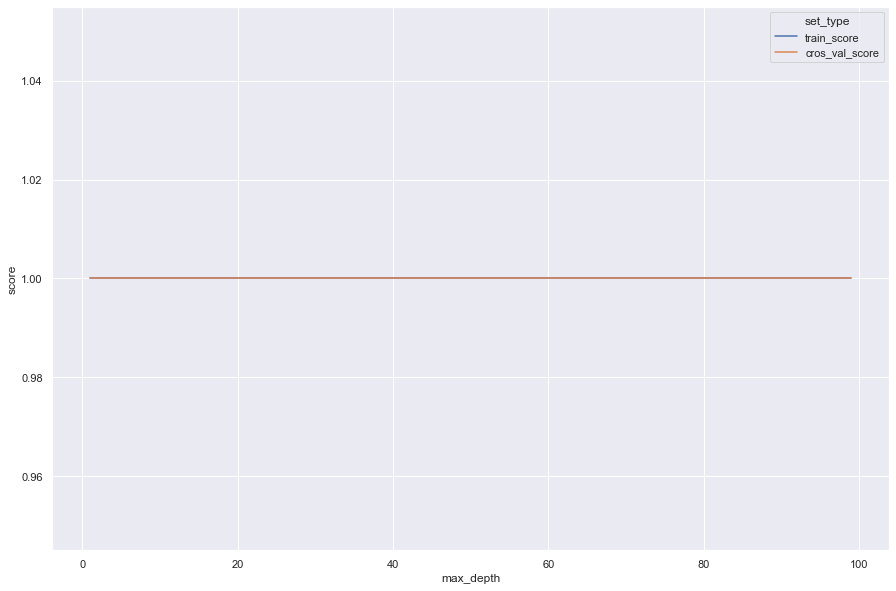

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = scores_data_long, x = 'max_depth', y = 'score', hue = 'set_type')

[Text(0.5, 0.75, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

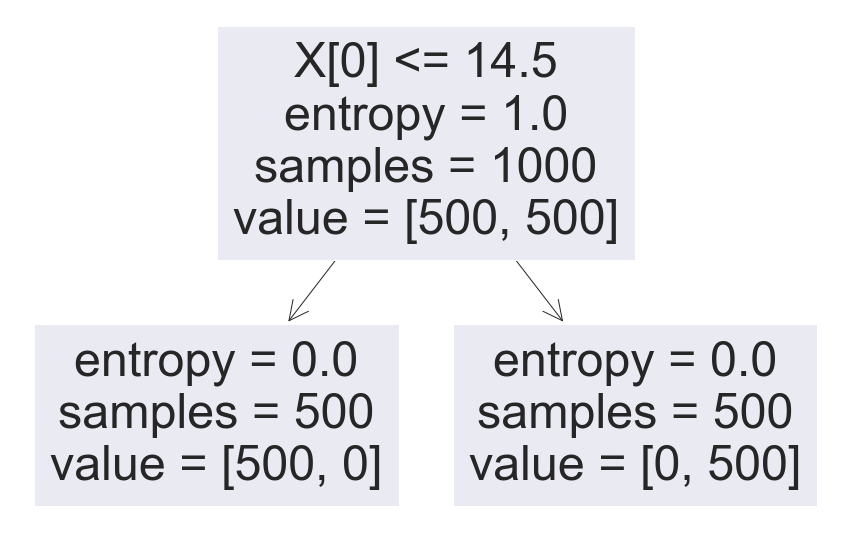

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 1)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [17]:
# тест
test = pd.read_json('dataset_209691_15.txt')
test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,19,22.8,1,1,0
2,15,18.0,1,1,0
3,33,39.6,1,0,0
4,18,21.6,1,1,0
...,...,...,...,...,...
95,7,2.8,1,0,1
96,9,3.6,1,0,1
97,14,5.6,1,0,1
98,8,3.2,1,0,1


In [18]:
a = clf.predict(test)

In [19]:
sum(a)

41